<a href="https://colab.research.google.com/github/vrmusketeers/FYP-2021/blob/master/notebooks/neural_net/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output.zip' -d '/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output'

In [ ]:
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output/__MACOSX'
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output/Output/train/.ipynb_checkpoints'
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output/Output/test/.ipynb_checkpoints'
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output/Output/val/.ipynb_checkpoints'

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

# Data Pre-Processing

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory('/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output/Output/train', batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory('/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output/Output/val', batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 6968 images belonging to 2 classes.
Found 871 images belonging to 2 classes.


# Model and Architecture
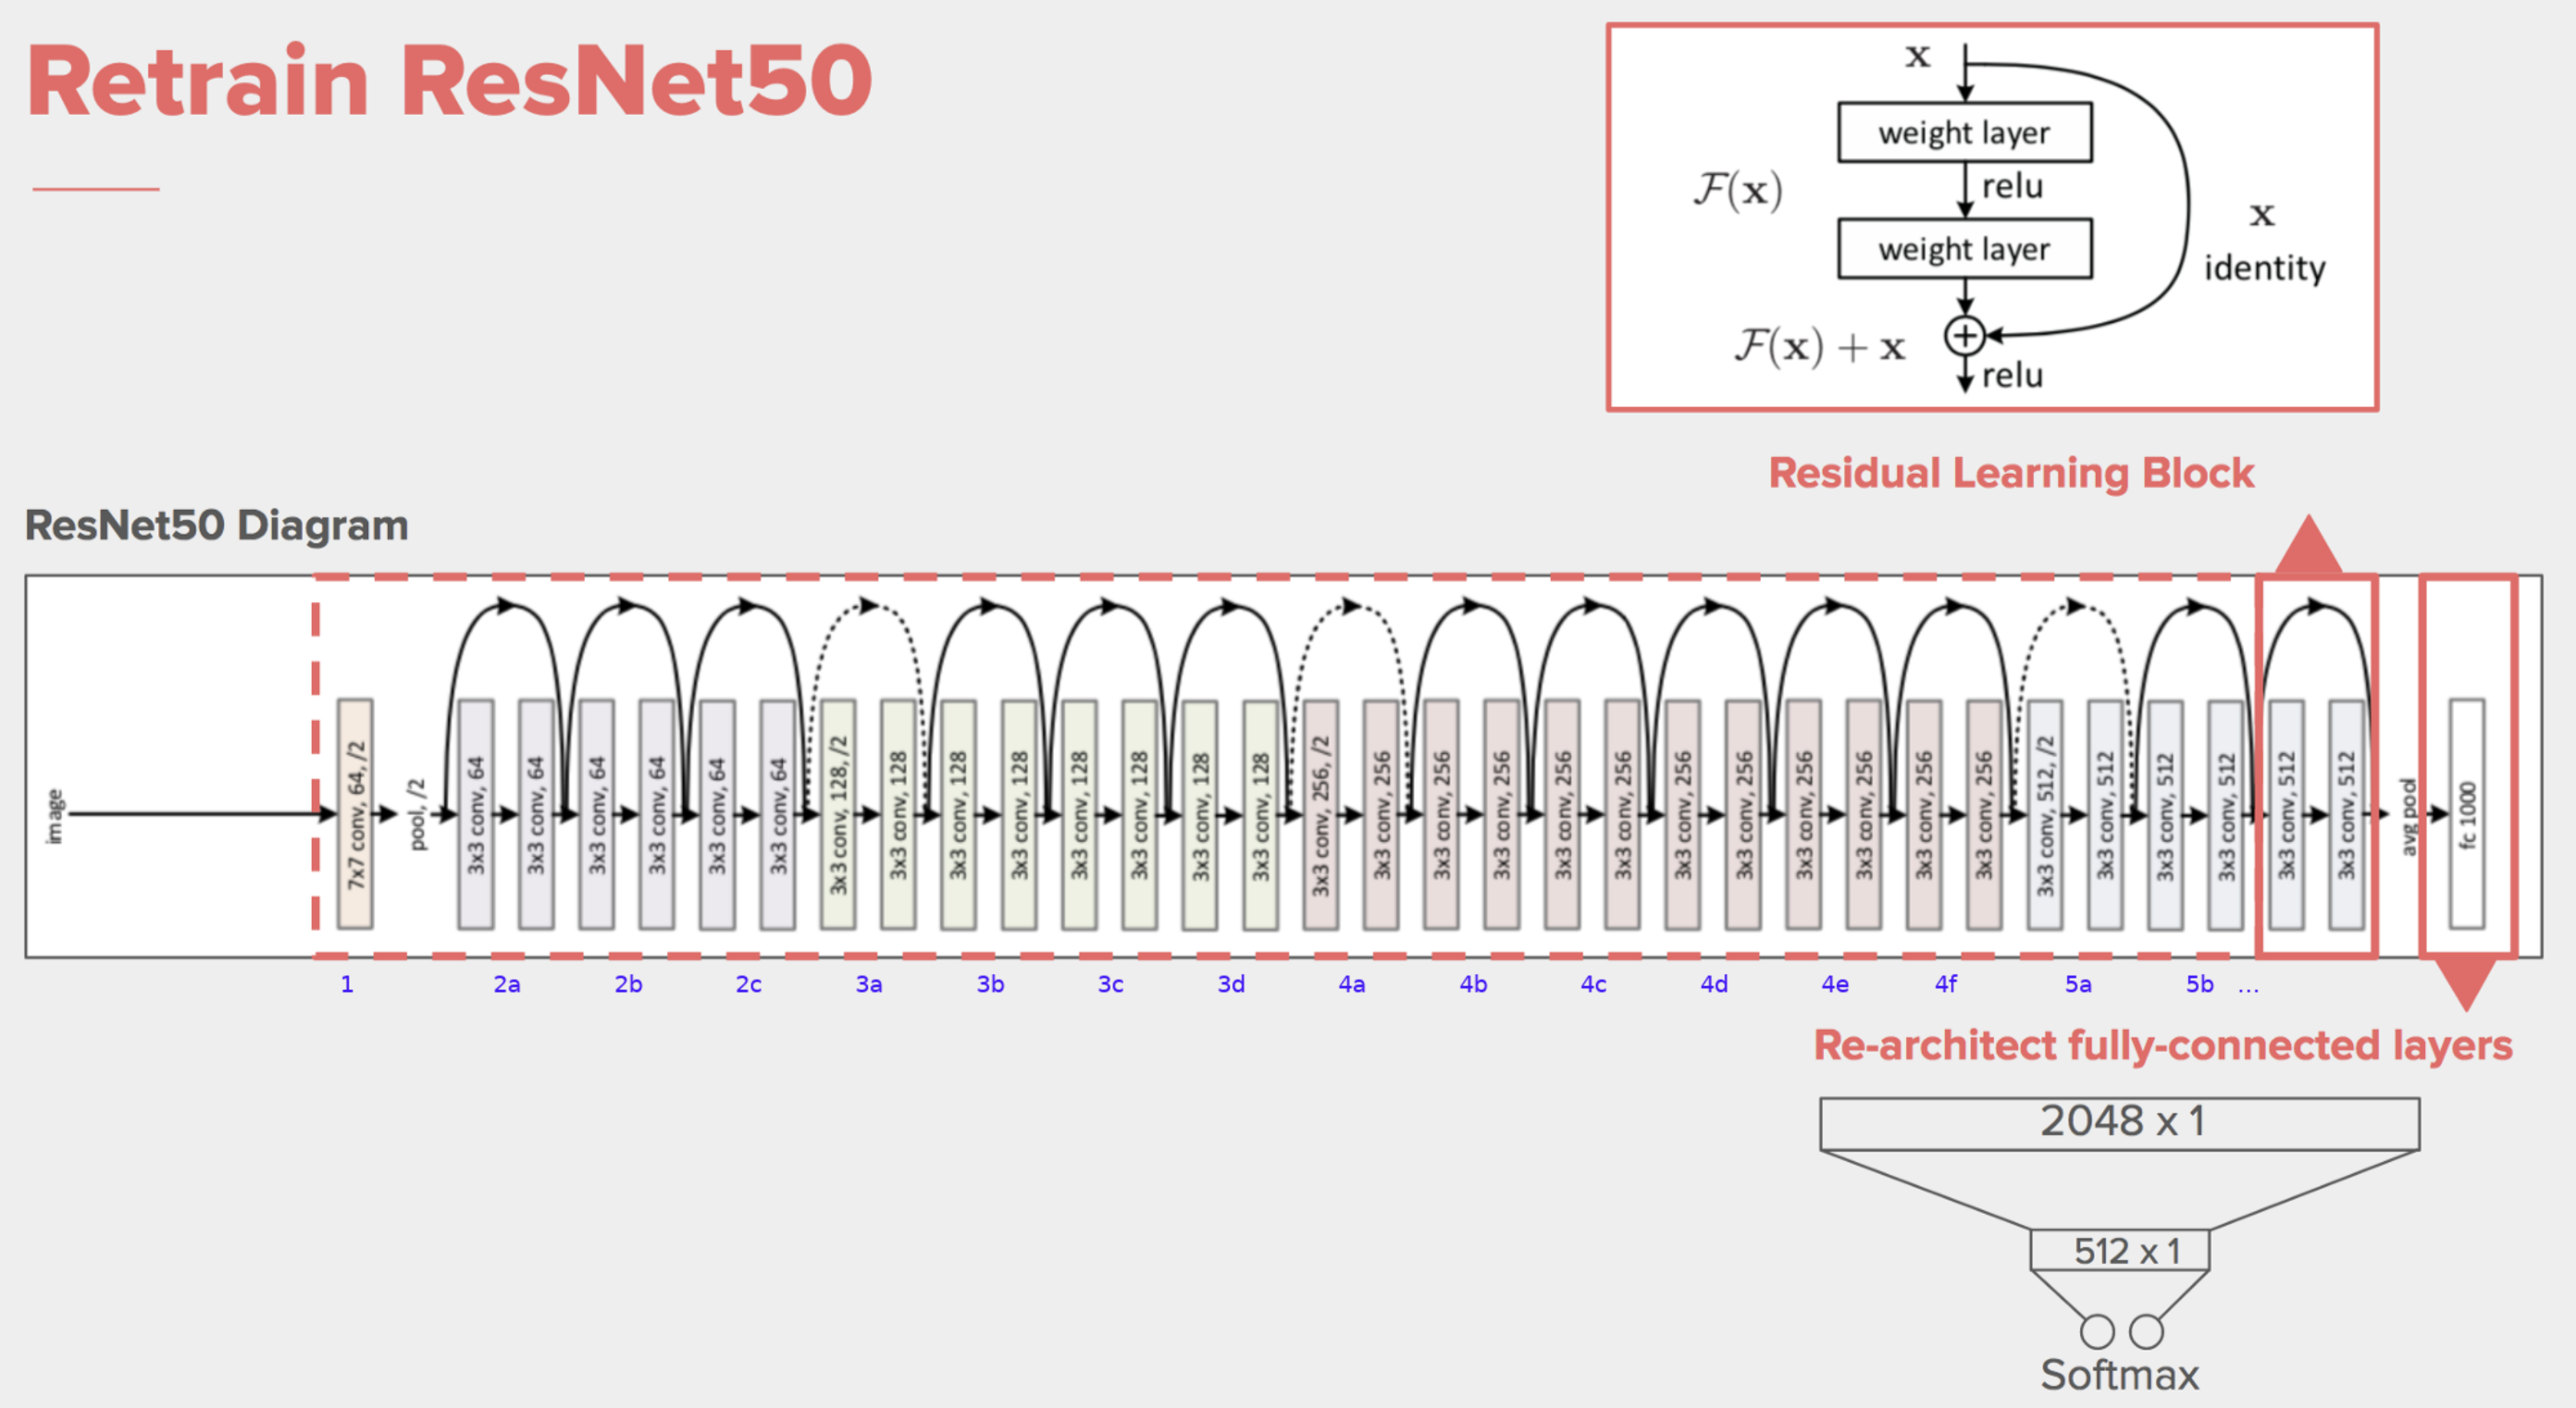

The way Resnet50 works is as follows:-

1. We start off with a single Convolution Layer and a Max Pooling layer.
2. There are 4 similar layers and the filter size varies
3. After 2 convolutions, we bypass the layers in between.
4. These skipped connections are called 'identity shortcut connections'
5. The last block is being trained and then we use a softmax layer for classification

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

## Model Compilation

In [ ]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

## Model Training

In [ ]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 10, epochs = 20)

Epoch 1/20
10/10 [==============================] - 909s 98s/step - loss: 2.4940 - acc: 0.4750 - val_loss: 1.0089 - val_acc: 0.4627
Epoch 2/20
10/10 [==============================] - 160s 16s/step - loss: 2.1724 - acc: 0.4950 - val_loss: 1.3399 - val_acc: 0.4627
Epoch 3/20
10/10 [==============================] - 155s 16s/step - loss: 2.1413 - acc: 0.4850 - val_loss: 1.2508 - val_acc: 0.4627
Epoch 4/20
10/10 [==============================] - 147s 15s/step - loss: 2.2268 - acc: 0.4900 - val_loss: 1.1518 - val_acc: 0.4627
Epoch 5/20
10/10 [==============================] - 139s 14s/step - loss: 2.0395 - acc: 0.4850 - val_loss: 1.0882 - val_acc: 0.4627
Epoch 6/20
10/10 [==============================] - 143s 14s/step - loss: 2.1831 - acc: 0.4800 - val_loss: 0.9279 - val_acc: 0.4638
Epoch 7/20
10/10 [==============================] - 147s 15s/step - loss: 1.6742 - acc: 0.5500 - val_loss: 0.9911 - val_acc: 0.4638
Epoch 8/20
10/10 [==============================] - 130s 13s/step - loss: 1.

In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/Shareddrives/Final Project/FmriTrainTestData/ResNet50-Data/Output/Output/test', batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 871 images belonging to 2 classes.


# Visualization of Accuracy



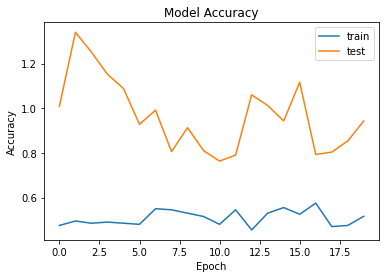

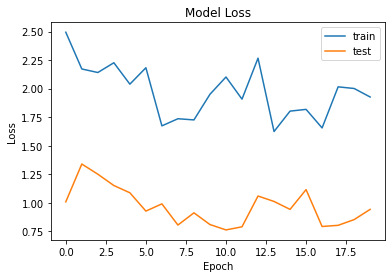

In [ ]:
# summarize history for accuracy
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Confusion Matrix

In [ ]:
probabilities = base_model.predict_generator(generator=test_generator)
y_true = test_generator.classes
y_pred = probabilities > 0.5
font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


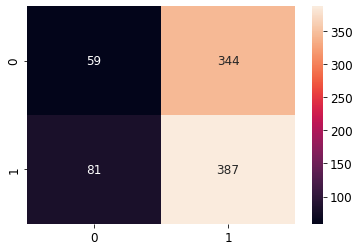

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, y_pred)
# plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), show_normed=False)

#plot_confusion_matrix(model, y_true, y_pred)
f = sns.heatmap(mat, annot=True, fmt='d')